In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("crop_yield_cleaned.csv")
dataset

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999984,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999985,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999986,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999987,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999989 entries, 0 to 999988
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  999989 non-null  object 
 1   Soil_Type               999989 non-null  object 
 2   Crop                    999989 non-null  object 
 3   Rainfall_mm             999989 non-null  float64
 4   Temperature_Celsius     999989 non-null  float64
 5   Fertilizer_Used         999989 non-null  bool   
 6   Irrigation_Used         999989 non-null  bool   
 7   Weather_Condition       999989 non-null  object 
 8   Days_to_Harvest         999989 non-null  int64  
 9   Yield_tons_per_hectare  999989 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [4]:
dataset['Irrigation_Used'].dtypes

dtype('bool')

In [5]:
def quanqual(dataset):
    quan=[]
    qual=[]
    for columnName in dataset.columns:
        if(dataset[columnName].dtype=='O' or dataset[columnName].dtype=='bool'):
            qual.append(columnName)
        else:
            quan.append(columnName)
    return quan,qual
quan,qual=quanqual(dataset)

In [6]:
quan

['Rainfall_mm',
 'Temperature_Celsius',
 'Days_to_Harvest',
 'Yield_tons_per_hectare']

In [7]:
qual

['Region',
 'Soil_Type',
 'Crop',
 'Fertilizer_Used',
 'Irrigation_Used',
 'Weather_Condition']

In [8]:
import numpy as np

In [9]:
np.percentile(dataset['Yield_tons_per_hectare'],100)

9.963372229

In [10]:
descriptive = pd.DataFrame(index=["Mean", "Median", "Mode","Q1:25%","Q2:50%","Q3:75%","99%","Q4:100%","IQR","1.5rule","lesser","greader","min","max","kurtosis","skew"], columns=quan)

for columnName in quan:
    descriptive.loc["Mean", columnName] = dataset[columnName].mean()
    descriptive.loc["Median", columnName] = dataset[columnName].median()  
    descriptive.loc["Mode", columnName] = dataset[columnName].mode().iloc[0]
    descriptive.loc["Q1:25%",columnName]=np.percentile(dataset[columnName],25)
    descriptive.loc["Q2:50%",columnName]=np.percentile(dataset[columnName],50)
    descriptive.loc["Q3:75%",columnName]=np.percentile(dataset[columnName],75)
    descriptive.loc["99%",columnName]=np.percentile(dataset[columnName],99)
    descriptive.loc["Q4:100%",columnName]=np.percentile(dataset[columnName],100)
    descriptive.loc["IQR", columnName] = descriptive[columnName]["Q3:75%"] - descriptive[columnName]["Q1:25%"]
    descriptive.loc["1.5rule",columnName]=1.5*descriptive[columnName]["IQR"]
    descriptive.loc["lesser",columnName]=descriptive[columnName]["Q1:25%"] - descriptive[columnName]["1.5rule"]
    descriptive.loc["greader",columnName]=descriptive[columnName]["Q3:75%"] + descriptive[columnName]["1.5rule"]
    descriptive.loc["min",columnName]=dataset[columnName].min()
    descriptive.loc["max",columnName]=dataset[columnName].max()
    descriptive.loc["kurtosis",columnName]=dataset[columnName].kurtosis()
    descriptive.loc["skew",columnName]=dataset[columnName].skew()

In [11]:
descriptive

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
Mean,549.982173,27.505014,104.494921,4.649479
Median,550.123317,27.507477,104.0,4.651813
Mode,117.166512,15.060695,91,0.931381
Q1:25%,324.891721,21.25453,82.0,3.41764
Q2:50%,550.123317,27.507477,104.0,4.651813
Q3:75%,774.739075,33.753286,127.0,5.879216
99%,990.857217,39.752994,149.0,8.312342
Q4:100%,999.998098,39.999997,149.0,9.963372
IQR,449.847354,12.498757,45.0,2.461576
1.5rule,674.771031,18.748135,67.5,3.692364


In [12]:
descriptive["Days_to_Harvest"]["min"]<descriptive["Days_to_Harvest"]["lesser"]

False

In [13]:
lesser=[]
greader=[]
for columnName in quan:
    if(descriptive[columnName]["min"]<descriptive[columnName]["lesser"]):
        lesser.append(columnName)
    if(descriptive[columnName]["max"]>descriptive[columnName]["greader"]):
        greader.append(columnName)

In [14]:
lesser

['Yield_tons_per_hectare']

In [15]:
greader

['Yield_tons_per_hectare']

In [16]:
for columnName in lesser:
    dataset.loc[dataset[columnName] < descriptive[columnName]["lesser"], columnName] = descriptive[columnName]["lesser"]
for columnName in greader:
    dataset.loc[dataset[columnName] > descriptive[columnName]["greader"], columnName] = descriptive[columnName]["greader"]

In [17]:
descriptive = pd.DataFrame(index=["Mean", "Median", "Mode","Q1:25%","Q2:50%","Q3:75%","99%","Q4:100%","IQR","1.5rule","lesser","greader","min","max","skew","kurtosis","var","std"], columns=quan)

for columnName in quan:
    descriptive.loc["Mean", columnName] = dataset[columnName].mean()
    descriptive.loc["Median", columnName] = dataset[columnName].median()  
    descriptive.loc["Mode", columnName] = dataset[columnName].mode().iloc[0]
    descriptive.loc["Q1:25%",columnName]=np.percentile(dataset[columnName],25)
    descriptive.loc["Q2:50%",columnName]=np.percentile(dataset[columnName],50)
    descriptive.loc["Q3:75%",columnName]=np.percentile(dataset[columnName],75)
    descriptive.loc["99%",columnName]=np.percentile(dataset[columnName],99)
    descriptive.loc["Q4:100%",columnName]=np.percentile(dataset[columnName],100)
    descriptive.loc["IQR", columnName] = descriptive[columnName]["Q3:75%"] - descriptive[columnName]["Q1:25%"]
    descriptive.loc["1.5rule",columnName]=1.5*descriptive[columnName]["IQR"]
    descriptive.loc["lesser",columnName]=descriptive[columnName]["Q1:25%"] - descriptive[columnName]["1.5rule"]
    descriptive.loc["greader",columnName]=descriptive[columnName]["Q3:75%"] + descriptive[columnName]["1.5rule"]
    descriptive.loc["min",columnName]=dataset[columnName].min()
    descriptive.loc["max",columnName]=dataset[columnName].max()
    descriptive.loc["kurtosis",columnName]=dataset[columnName].kurtosis()
    descriptive.loc["skew",columnName]=dataset[columnName].skew()
    descriptive.loc["var",columnName]=dataset[columnName].var()
    descriptive.loc["std",columnName]=dataset[columnName].std()

In [18]:
descriptive

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
Mean,549.982173,27.505014,104.494921,4.649487
Median,550.123317,27.507477,104.0,4.651813
Mode,117.166512,15.060695,91,-0.274723
Q1:25%,324.891721,21.25453,82.0,3.41764
Q2:50%,550.123317,27.507477,104.0,4.651813
Q3:75%,774.739075,33.753286,127.0,5.879216
99%,990.857217,39.752994,149.0,8.312342
Q4:100%,999.998098,39.999997,149.0,9.57158
IQR,449.847354,12.498757,45.0,2.461576
1.5rule,674.771031,18.748135,67.5,3.692364


In [19]:
lesser=[]
greader=[]
for columnName in quan:
    if(descriptive[columnName]["min"]<descriptive[columnName]["lesser"]):
        lesser.append(columnName)
    if(descriptive[columnName]["max"]>descriptive[columnName]["greader"]):
        greader.append(columnName)

In [20]:
lesser

[]

In [21]:
greader

[]

In [22]:
import seaborn as sns

C:\Users\tiruk\AppData\Local\Temp\ipykernel_2976\2921121842.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Days_to_Harvest"])


<Axes: xlabel='Days_to_Harvest', ylabel='Density'>

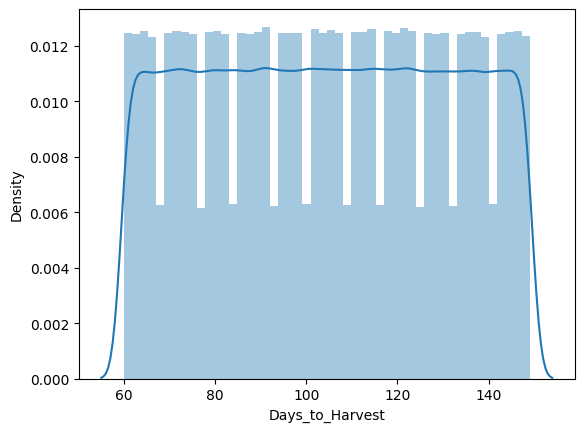

In [23]:
sns.distplot(dataset["Days_to_Harvest"])

In [24]:
#pdf
def get_pdf_probability(ds,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(ds,kde=True,kde_kws={'color':'blue'},color='green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    #generate a sample
    sample=ds
    #calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f,Standard Deviation=%.3f' %(sample_mean,sample_std))
    #define the distribution
    dist=norm(sample_mean,sample_std)

    #sample probabilities for a range of outcomes
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
   
    return prob

C:\Users\tiruk\AppData\Local\Temp\ipykernel_2976\1730547310.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(ds,kde=True,kde_kws={'color':'blue'},color='green')


Mean=104.495,Standard Deviation=25.953
The area between range(100,120):0.29474456052185116


0.29474456052185116

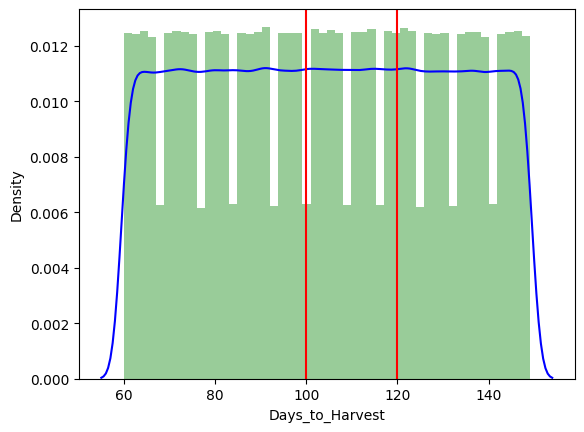

In [25]:
get_pdf_probability(dataset["Days_to_Harvest"],100,120)

In [26]:
#cdf
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['Days_to_Harvest'])
ecdf(80)

0.23295156246718712

In [27]:
#snd
def stdNBgraph(dataset):
    # converted to std normal distribution
    mean = dataset.mean() 
    std = dataset.std()  

    values = [i for i in dataset]

    z_score = [((j - mean) / std) for j in values]  

    sns.distplot(z_score, kde=True)

    print(sum(z_score) / len(z_score))  


C:\Users\tiruk\AppData\Local\Temp\ipykernel_2976\919892216.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score, kde=True)


7.676463973132636e-16


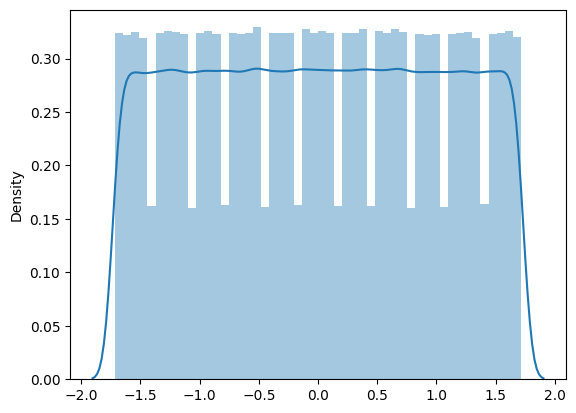

In [28]:
stdNBgraph(dataset["Days_to_Harvest"])